In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

1. Memuat data.
2. Eksplorasi data awal.
3. Menangani missing values.
4. Encoding variabel kategorikal (jika ada).
5. Feature scaling (untuk regresi linear).
6. Pembagian data menjadi training dan testing set.

In [306]:
df=pd.read_csv("../dataset/data_jarak.csv")

In [307]:
df.head()

,No,Nomor Resi,ExtID,Kota Penerima,Kantor Asal,Kantor Tujuan,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Produk,Tanggal Kirim,Isi Kiriman,Kota,longitude,latitude,Jarak (KM)
0,3.00,LPU19128662xxxx,NaN,"kota banjarmasin,banjarmasin tengah,kertak bar...",KC AMUNTAI 71400,DC BANJARMASIN 70006,"5,000.00",0.00,"5,000.00",NaN,0.10,PPB_SRT,2023-01-10 14:43:37,NaN,kota banjarmasin,114.59,-3.32,123.70
1,4.00,LPU19128662xxxx,NaN,"kabupaten hulu sungai utara,amuntai tengah,har...",KC AMUNTAI 71400,KC AMUNTAI 71400,"3,500.00",0.00,"3,500.00",NaN,0.10,PPB_SRT,2023-01-10 14:42:45,NaN,kabupaten hulu sungai utara,115.13,-2.45,12.44
2,5.00,LPU19128662xxxx,NaN,"kota banjarmasin,banjarmasin timur,karang mekar",KC AMUNTAI 71400,DC BANJARMASIN 70006,"5,000.00",0.00,"5,000.00",NaN,0.10,PPB_SRT,2023-01-10 14:40:05,NaN,kota banjarmasin,114.59,-3.32,123.70
3,6.00,LPU19128662xxxx,NaN,"kabupaten hulu sungai utara,amuntai tengah,tan...",KC AMUNTAI 71400,KC AMUNTAI 71400,"3,500.00",0.00,"3,500.00",NaN,0.10,PPB_SRT,2023-01-10 14:44:13,NaN,kabupaten hulu sungai utara,115.13,-2.45,12.44
4,7.00,P230102000xxxx,NaN,"kota tangerang,ciledug sudimara barat",KC AMUNTAI 71400,KCP CILEDUGTANGERANG 15157,"34,000.00",960.00,"34,960.00","400,000.00",1.00,PKH,2023-01-02 06:53:15,GIGI,kota tangerang,106.63,-6.18,"1,042.30"


In [308]:
df.shape

(3436, 18)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             3436 non-null   float64
 1   Nomor Resi     3436 non-null   object 
 2   ExtID          2256 non-null   object 
 3   Kota Penerima  3436 non-null   object 
 4   Kantor Asal    3436 non-null   object 
 5   Kantor Tujuan  3435 non-null   object 
 6   Bea Dasar      3436 non-null   float64
 7   Htnb           3436 non-null   float64
 8   Total          3436 non-null   float64
 9   Harga Barang   3370 non-null   float64
 10  Berat Kiriman  3436 non-null   float64
 11  Produk         3436 non-null   object 
 12  Tanggal Kirim  3436 non-null   object 
 13  Isi Kiriman    3432 non-null   object 
 14  Kota           3436 non-null   object 
 15  longitude      3436 non-null   float64
 16  latitude       3436 non-null   float64
 17  Jarak (KM)     3436 non-null   float64
dtypes: float

In [310]:
# Mengatur tampilan float agar tidak menggunakan notasi ilmiah dan menampilkan 2 desimal
pd.options.display.float_format = '{:,.2f}'.format

df.describe()

,No,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,longitude,latitude,Jarak (KM)
count,"3,436.00","3,436.00","3,436.00","3,436.00","3,370.00","3,436.00","3,436.00","3,436.00","3,436.00"
mean,"1,721.36","31,171.71",424.09,"31,595.81","244,695.62",1.10,113.94,-3.31,282.70
std,993.37,"96,432.58","1,724.47","97,713.19","720,626.25",7.03,3.26,1.92,356.77
min,3.00,"3,500.00",0.00,"3,500.00",0.00,0.00,95.33,-10.22,12.44
25%,860.75,"9,000.00",0.00,"9,960.00","44,000.00",0.10,114.59,-3.42,65.59
50%,"1,720.50","13,500.00",0.00,"14,000.00","132,249.00",0.24,114.83,-3.32,123.70
75%,"2,581.25","33,125.00",500.00,"33,500.00","299,975.00",1.00,115.42,-2.33,292.02
max,"3,446.00","1,961,000.00","36,000.00","1,985,000.00","15,000,000.00",120.00,131.25,5.54,"2,381.85"


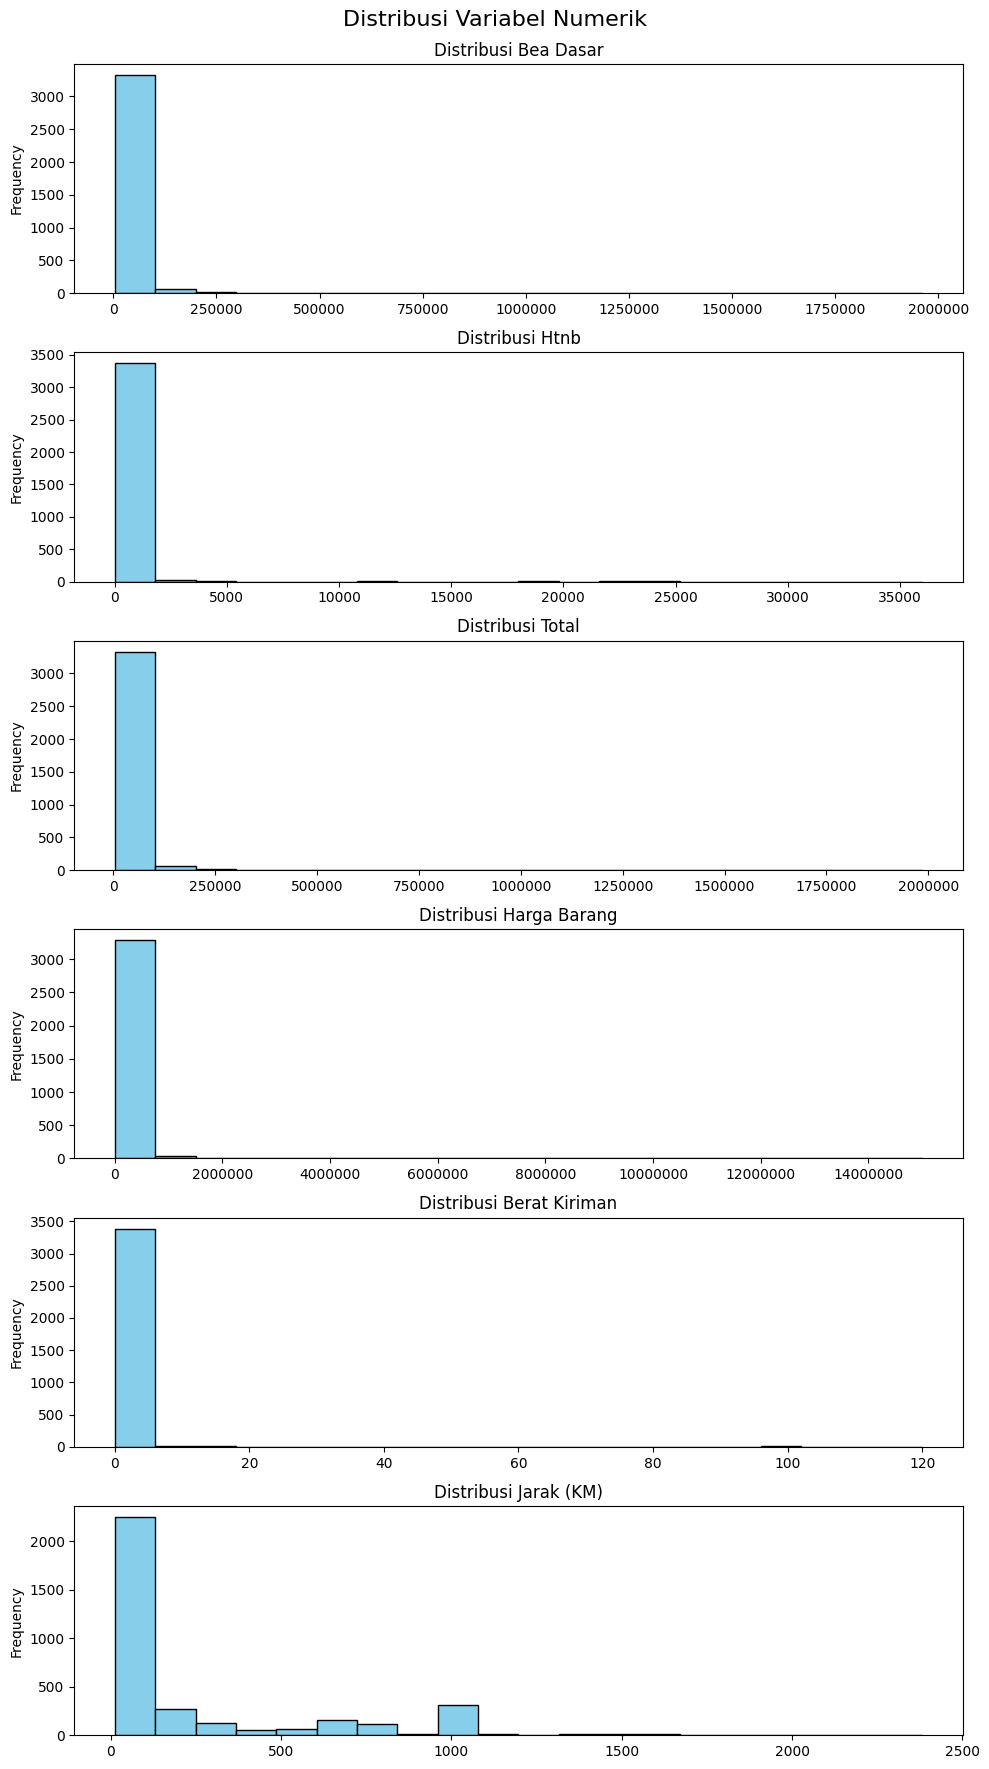

In [311]:
# Daftar kolom numerik
numeric_columns = ['Bea Dasar', 'Htnb', 'Total', 'Harga Barang', 'Berat Kiriman', 'Jarak (KM)']

# Membuat histogram untuk variabel numerik
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns) * 3))

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.ticklabel_format(style='plain')  # Menghindari notasi ilmiah untuk sumbu x
    ax.set_xlabel('')  # Opsional: Menghapus label sumbu x jika tidak diperlukan

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik', fontsize=16)
plt.subplots_adjust(top=0.95)  # Menyesuaikan supaya judul tidak bertumpang tindih
plt.show()

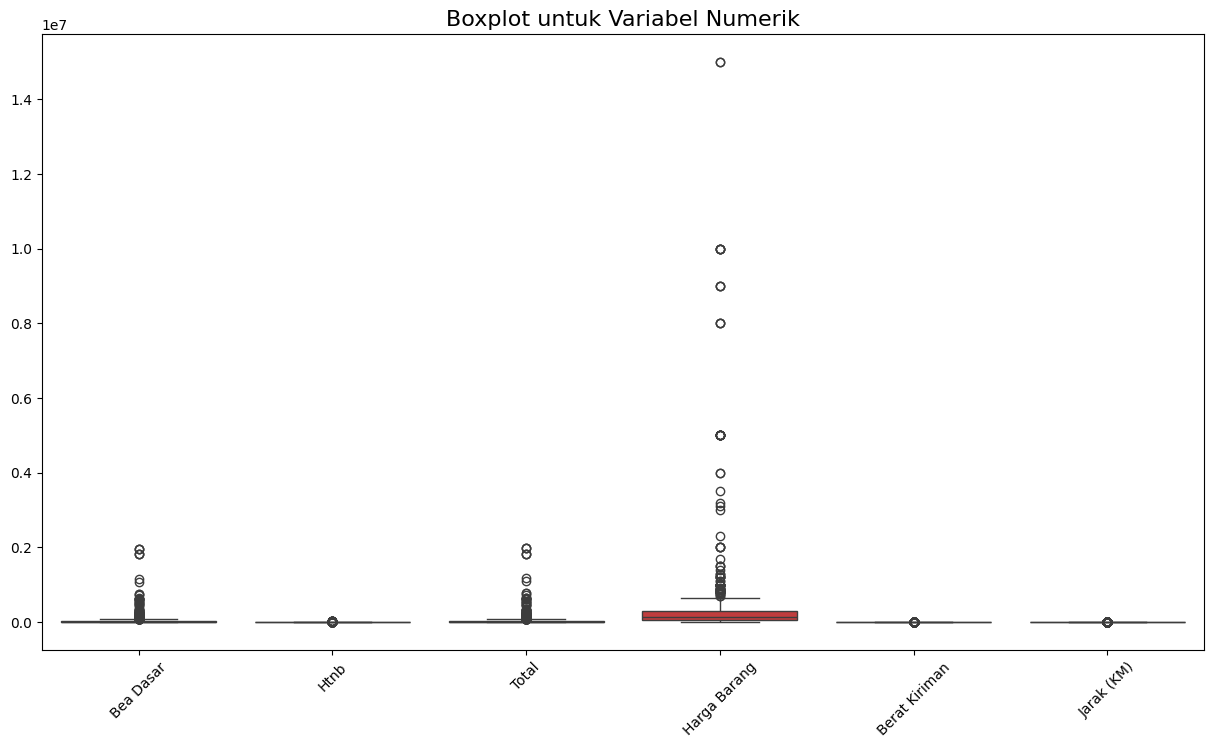

In [312]:
import seaborn as sns

# Membuat boxplot untuk variabel numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot untuk Variabel Numerik', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [313]:
from scipy.stats.mstats import winsorize

# Winsorizing (memotong outliers)
df_winsorized = df.copy()
df_winsorized = df_winsorized[numeric_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))


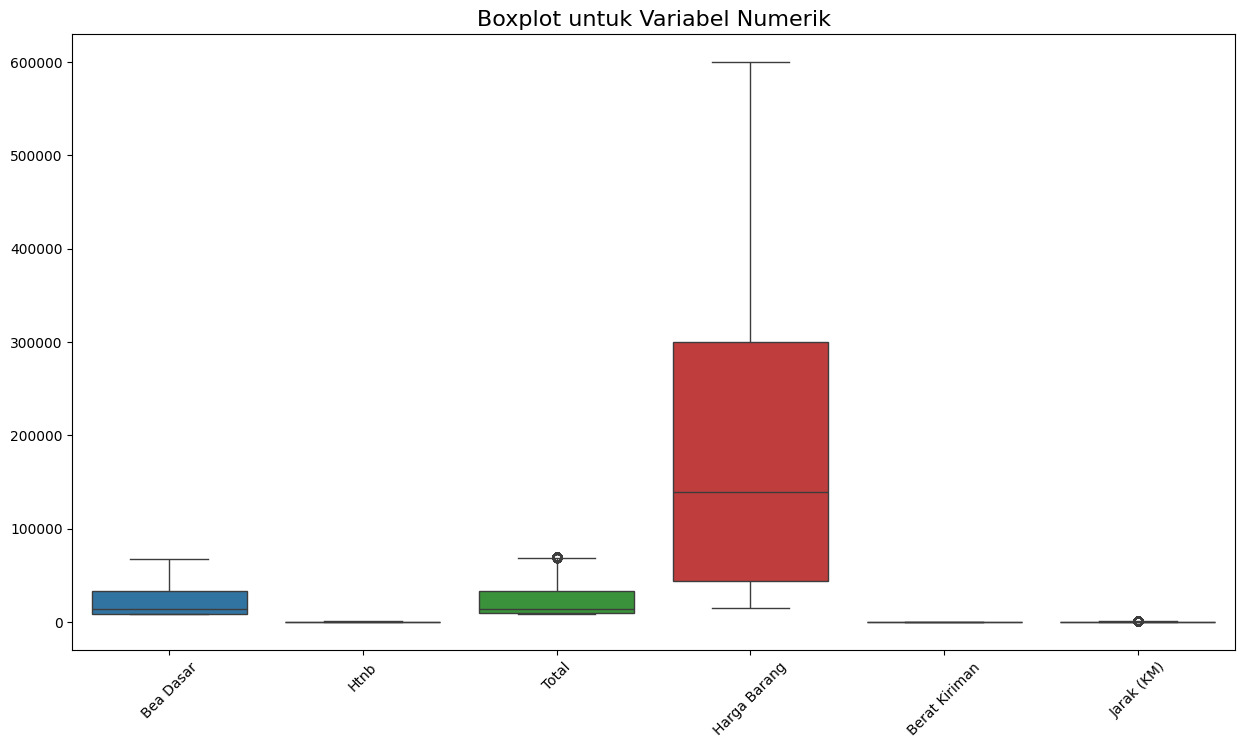

In [314]:
import seaborn as sns

# Membuat boxplot untuk variabel numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_winsorized)
plt.title('Boxplot untuk Variabel Numerik', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [315]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers
df_cleaneds = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


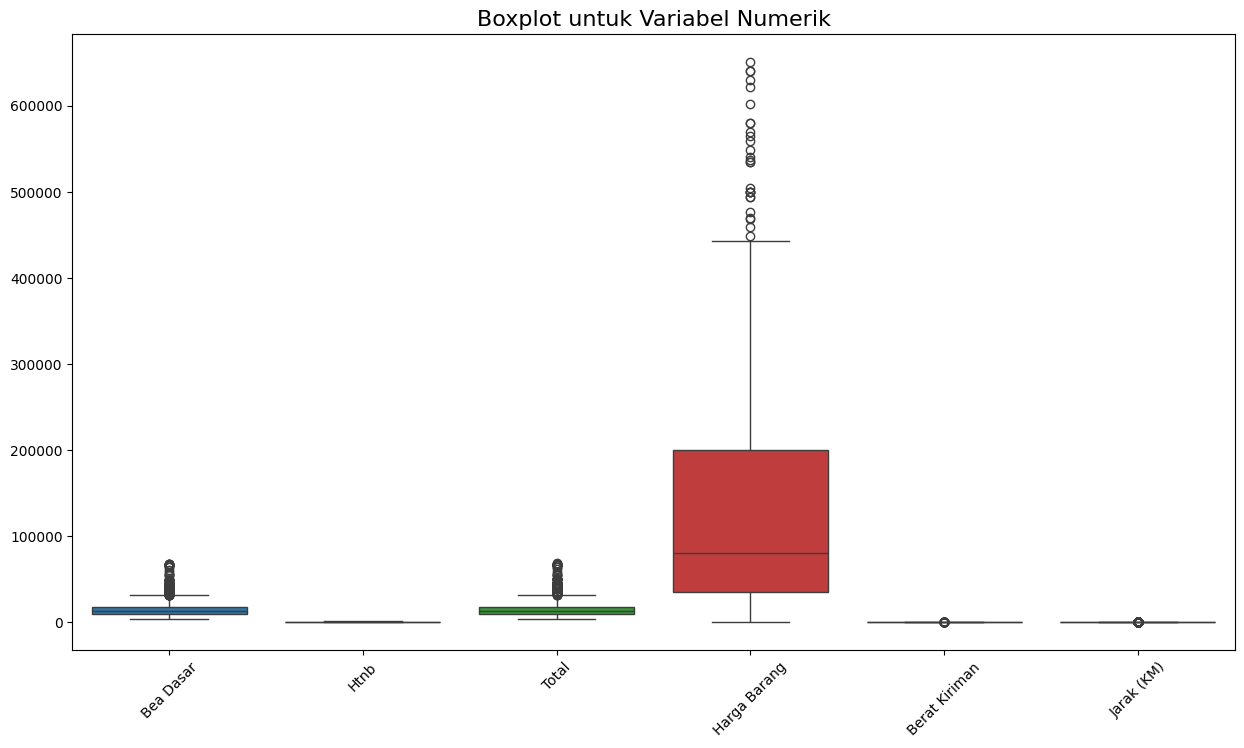

In [332]:
import seaborn as sns

# Membuat boxplot untuk variabel numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaneds[numeric_columns])
plt.title('Boxplot untuk Variabel Numerik', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [317]:
import numpy as np

# Transformasi log untuk mengurangi pengaruh outliers
df_transformed = df.copy()
df_transformed[numeric_columns] = df_transformed[numeric_columns].apply(np.log1p)  # log(1 + x)


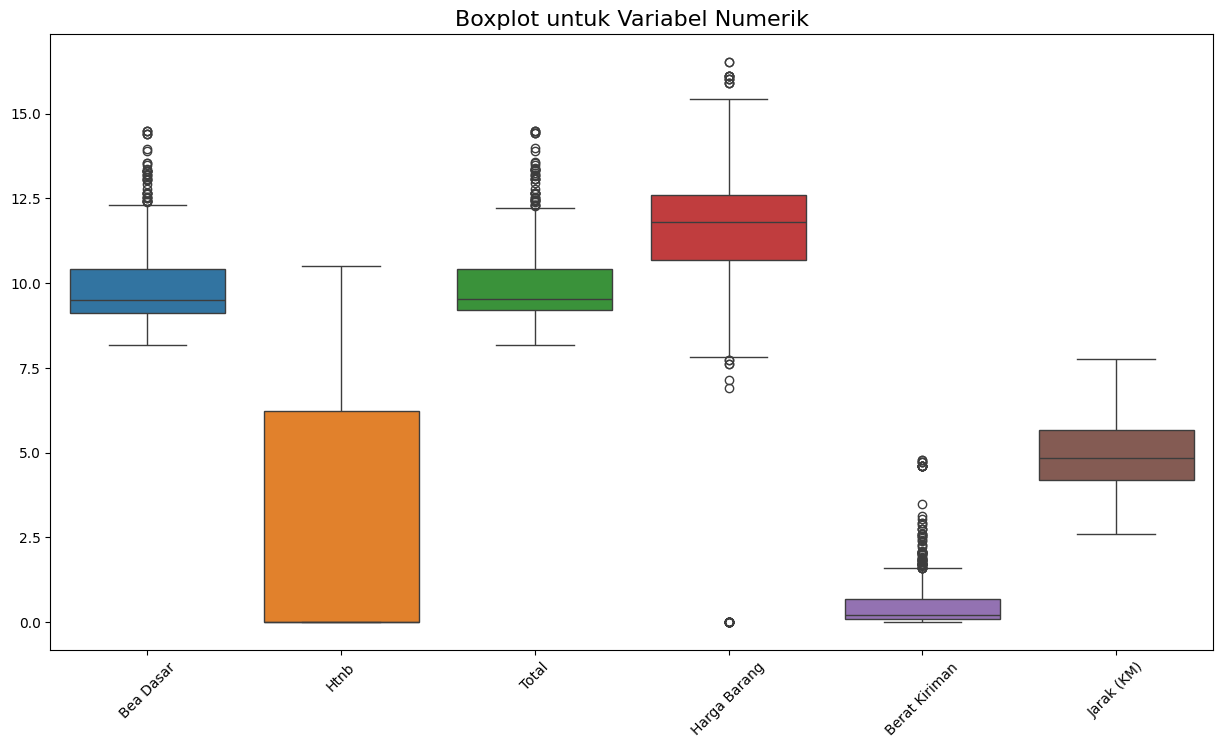

In [333]:
import seaborn as sns

# Membuat boxplot untuk variabel numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_transformed[numeric_columns])
plt.title('Boxplot untuk Variabel Numerik', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [319]:
df.isnull().sum()

No                  0
Nomor Resi          0
ExtID            1180
Kota Penerima       0
Kantor Asal         0
Kantor Tujuan       1
Bea Dasar           0
Htnb                0
Total               0
Harga Barang       66
Berat Kiriman       0
Produk              0
Tanggal Kirim       0
Isi Kiriman         4
Kota                0
longitude           0
latitude            0
Jarak (KM)          0
dtype: int64

In [320]:
data_cleaned = df.dropna(subset=['Isi Kiriman','Bea Dasar'])

In [321]:
frequency = data_cleaned['Isi Kiriman'].value_counts()
frequency

Isi Kiriman
DOC                             786
Men Clothes                     390
Mobile & Gadgets                303
Beauty                          288
Mobile & Accessories            235
                               ... 
DOMPET                            1
GELANG KESEHATAN                  1
Tickets, Vouchers & Services      1
mainan                            1
MIE                               1
Name: count, Length: 199, dtype: int64

In [322]:
unique = data_cleaned['Isi Kiriman'].unique()
unique

array(['GIGI', 'OBAT', 'Books & Magazines', 'KOSMETIK', 'DOC',
       'Mobile & Gadgets', 'PERAKATAN DAPUR', 'HERBAL', 'IKAN KERING',
       'SKINCARE', 'SEJADAH', 'Audio', 'KAIN', 'SPM', 'Beauty', 'doc',
       'Women Clothes', 'MANDAI MASAK DAN KERUPUK', 'BAJU', 'gigi',
       'SPERPART KENDRAAN', 'KOPI', 'Food & Beverages', 'KERUDUNG',
       'BUKU', 'aksesoris', 'Health', 'MAKANAN KERING', 'baju', 'KERTAS',
       'KERUPUK', 'SENDAL', 'sepatu', 'kosmetik', 'SPM DA 6605 HL',
       'STNK', 'THERMO LUMINISCENCE DOSEMETER', 'kopi', 'obat', 'MAINAN',
       'KERAJINAN', 'Mom & Baby', 'STROLER', 'BAJU DAN SEPATU',
       'ALAT JAHIT', 'BASRENG', 'PLAT', 'MAKANAN PAKAIAN', 'KITAB',
       'KERUDUNG DAN KOSMETIK', 'GETAH PRESTO', 'TUANGAN KUE',
       'TUPPERWARE', 'Fashion Accessories', 'Beauty & Care',
       'Muslim Fashion', 'PANCI LISTRIK', 'AKSESORIS',
       'KK ASLIDAN KTP ASLI', 'SUSU', 'HP DAN SOVENIR', 'CAIRAN',
       'Sports & Outdoors', 'BIT', 'MAKANAN RINGAN', 'SPAREPART',


In [323]:
data_cleaned['Isi Kiriman'].value_counts()
frequency

Isi Kiriman
DOC                             786
Men Clothes                     390
Mobile & Gadgets                303
Beauty                          288
Mobile & Accessories            235
                               ... 
DOMPET                            1
GELANG KESEHATAN                  1
Tickets, Vouchers & Services      1
mainan                            1
MIE                               1
Name: count, Length: 199, dtype: int64

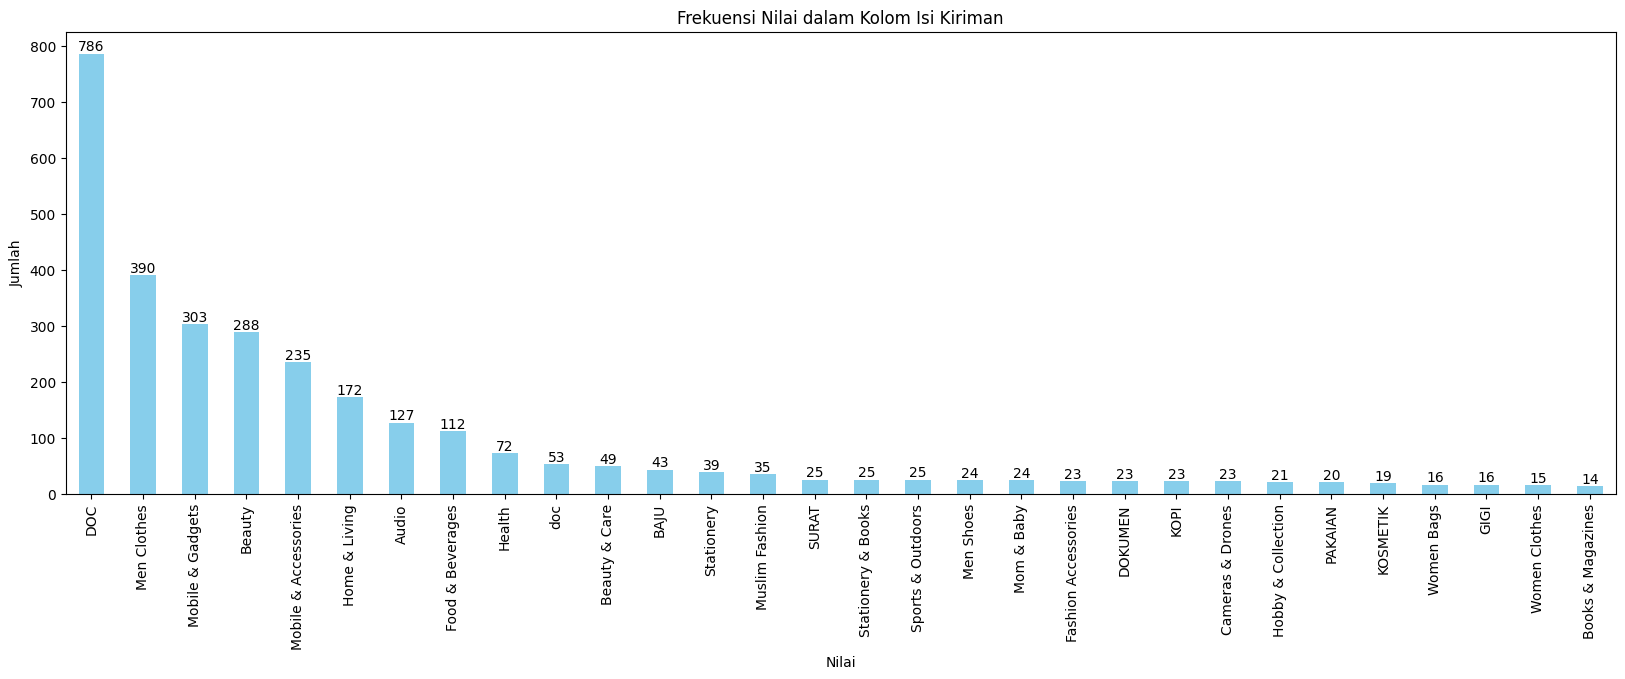

In [324]:
plt.figure(figsize=(20, 6))
ax = frequency.head(30).plot(kind='bar', color='skyblue')

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Frekuensi Nilai dalam Kolom Isi Kiriman')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

In [325]:
total_count = frequency.sum()
total_count

3432

In [326]:
len(unique)

199

In [327]:
data_cleaned

,No,Nomor Resi,ExtID,Kota Penerima,Kantor Asal,Kantor Tujuan,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Produk,Tanggal Kirim,Isi Kiriman,Kota,longitude,latitude,Jarak (KM)
4,7.00,P230102000xxxx,NaN,"kota tangerang,ciledug sudimara barat",KC AMUNTAI 71400,KCP CILEDUGTANGERANG 15157,"34,000.00",960.00,"34,960.00","400,000.00",1.00,PKH,2023-01-02 06:53:15,GIGI,kota tangerang,106.63,-6.18,"1,042.30"
5,8.00,P230102000xxxx,NaN,"kabupaten barito timur,awang,hayaping",KC AMUNTAI 71400,KCP TAMIANGLAYANG 73600,"28,000.00",500.00,"28,500.00","200,000.00",0.50,PKH,2023-01-02 07:53:26,OBAT,kabupaten barito timur,115.10,-1.93,55.55
6,9.00,P230102000xxxx,SHPE2212310xxxx,"kabupaten tapin,tapin tengah,andhika",KC AMUNTAI 71400,KC RANTAU 71100,"19,000.00",0.00,"19,000.00","15,000.00",0.15,EC3,2023-01-02 08:54:18,Books & Magazines,kabupaten tapin,115.03,-2.92,59.97
7,10.00,P230102001xxxx,NaN,"kabupaten hulu sungai utara,paminggir,paminggir",KC AMUNTAI 71400,KCP DANAU PANGGANG 71453B1,"17,000.00","1,920.00","18,920.00","800,000.00",2.60,PKH,2023-01-02 09:58:17,KOSMETIK,kabupaten hulu sungai utara,115.13,-2.45,12.44
8,11.00,P230102002xxxx,NaN,"kota banjarmasin,banjarmasin tengah,kertak bar...",KC AMUNTAI 71400,DC BANJARMASIN 70006,"18,500.00",500.00,"19,000.00","200,000.00",1.00,PE,2023-01-02 10:32:46,DOC,kota banjarmasin,114.59,-3.32,123.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,"3,442.00",P230607018xxxx,SHPE2306060xxxx,"kota banjarmasin,banjarmasin timur,benua anyar",KC AMUNTAI 71400,DC BANJARMASIN 70006,"9,000.00",0.00,"9,000.00","15,500.00",0.05,EC3,2023-06-07 15:23:59,Mobile & Accessories,kota banjarmasin,114.59,-3.32,123.70
3432,"3,443.00",P230607018xxxx,SHPE2306070xxxx,"kabupaten hulu sungai selatan,kandangan,kandan...",KC AMUNTAI 71400,KCP PADANG BATUNG 71281,"10,000.00",0.00,"10,000.00","22,500.00",0.05,EC3,2023-06-07 15:24:37,Mobile & Gadgets,kabupaten hulu sungai selatan,115.20,-2.75,37.24
3433,"3,444.00",P230607018xxxx,SHPE2306060xxxx,"kabupaten banjar,simpang empat,garis hanyar",KC AMUNTAI 71400,KCP SIMPANGEMPATMARTAPURA 70673,"11,000.00",0.00,"11,000.00","38,500.00",0.13,EC3,2023-06-07 15:26:02,Mobile & Gadgets,kabupaten banjar,115.08,-3.32,101.14
3434,"3,445.00",P230607018xxxx,SHPE2306070xxxx,"kabupaten hulu sungai utara,amuntai tengah,keb...",KC AMUNTAI 71400,KC AMUNTAI 71400,"7,000.00",0.00,"7,000.00","15,000.00",0.05,EC3,2023-06-07 15:26:46,Mobile & Gadgets,kabupaten hulu sungai utara,115.13,-2.45,12.44


In [328]:
numeric_columns = ['Bea Dasar', 'Htnb', 'Total', 'Harga Barang', 'Berat Kiriman', 'Jarak (KM)','Isi Kiriman']
data_cleaned = data_cleaned[numeric_columns]
# Mengubah 'Isi Kiriman' menjadi one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['Isi Kiriman'])
data_encoded


,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM),Isi Kiriman_1,Isi Kiriman_A,Isi Kiriman_AKSESORIS,Isi Kiriman_ALAT CUKUR,...,Isi Kiriman_doc,Isi Kiriman_dokumen,Isi Kiriman_gigi,Isi Kiriman_kopi,Isi Kiriman_kosmetik,Isi Kiriman_kuekering,Isi Kiriman_mainan,Isi Kiriman_obat,Isi Kiriman_sampel,Isi Kiriman_sepatu
4,"34,000.00",960.00,"34,960.00","400,000.00",1.00,"1,042.30",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"28,000.00",500.00,"28,500.00","200,000.00",0.50,55.55,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"19,000.00",0.00,"19,000.00","15,000.00",0.15,59.97,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"17,000.00","1,920.00","18,920.00","800,000.00",2.60,12.44,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"18,500.00",500.00,"19,000.00","200,000.00",1.00,123.70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,"9,000.00",0.00,"9,000.00","15,500.00",0.05,123.70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3432,"10,000.00",0.00,"10,000.00","22,500.00",0.05,37.24,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3433,"11,000.00",0.00,"11,000.00","38,500.00",0.13,101.14,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3434,"7,000.00",0.00,"7,000.00","15,000.00",0.05,12.44,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [329]:
# Menghitung korelasi
correlation = data_encoded.corr()['Bea Dasar']
correlation.head(10)

Bea Dasar                 1.00
Htnb                      0.74
Total                     1.00
Harga Barang              0.74
Berat Kiriman             0.82
Jarak (KM)                0.25
Isi Kiriman_1            -0.00
Isi Kiriman_A            -0.00
Isi Kiriman_AKSESORIS    -0.00
Isi Kiriman_ALAT CUKUR   -0.00
Name: Bea Dasar, dtype: float64

In [330]:
# Membuat heatmap untuk melihat korelasi antar variabel numerik
data_cleaned = data_cleaned.drop(columns=['Isi Kiriman'])

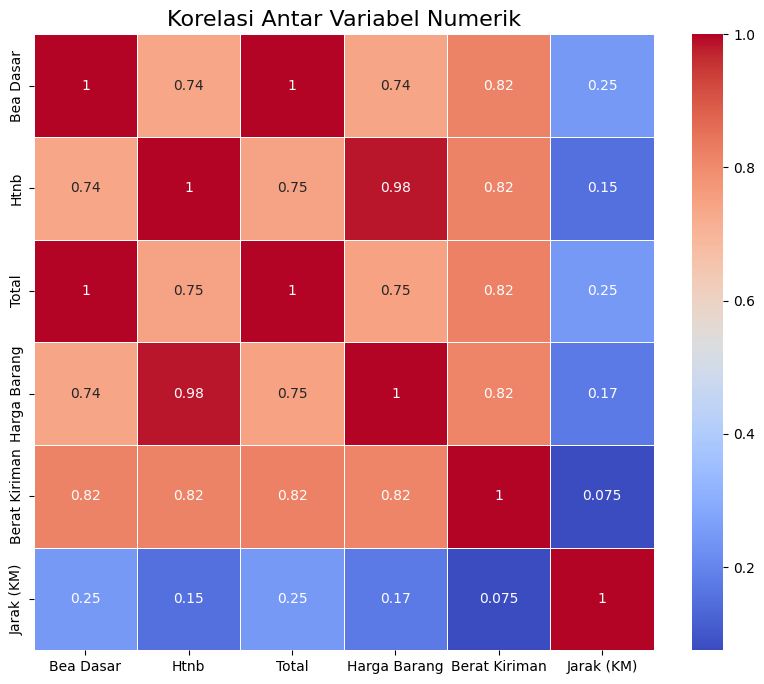

In [331]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()